# Regression of Used Car Prices

Kaggle Playground Series - Season 4, Episode 9

##### In this notebook, I will clean up the training data so it's ready for my model!

In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df.shape

(188533, 13)

In [5]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [6]:
df['price'].value_counts()

price
15000     1920
12000     1459
30000     1280
29000     1228
8500      1204
          ... 
239991      22
269991      22
259991      21
107998      20
45998       19
Name: count, Length: 1569, dtype: int64

In [7]:
print(df['price'].min())
print(df['price'].max())
print(df['price'].mean())

2000
2954083
43878.01617753921


In [8]:
print(df['milage'].min())
print(df['milage'].max())
print(df['milage'].mean())

100
405000
65705.2951737892


In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

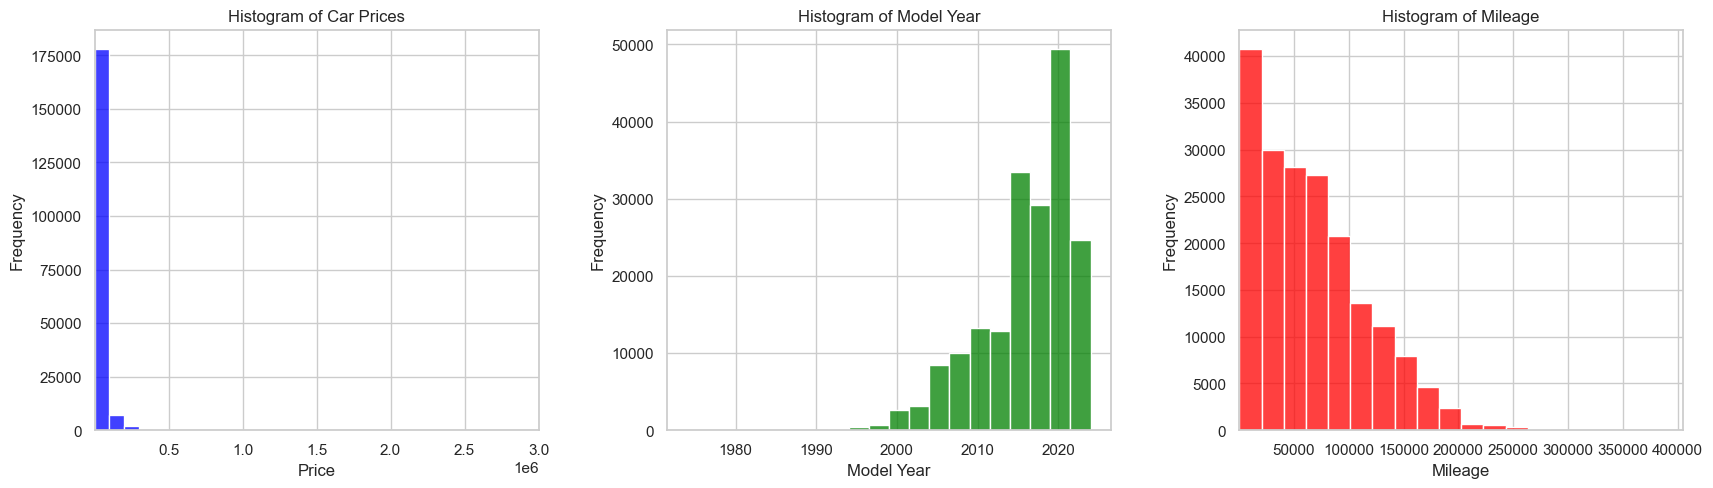

In [10]:
# Set the aesthetic style of the plots
sns.set_theme(style='whitegrid')

# Set up the figure and axes for a 1x3 grid of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.tight_layout(pad=5.0)

# Plot histogram for 'price'
sns.histplot(df['price'], bins=30, kde=False, color='blue', ax=axes[0])
axes[0].set_xlim(2000, 3000000)  # Setting the x-axis range
axes[0].set_title('Histogram of Car Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'model_year'
sns.histplot(df['model_year'], bins=20, kde=False, color='green', ax=axes[1])
axes[1].set_title('Histogram of Model Year')
axes[1].set_xlabel('Model Year')
axes[1].set_ylabel('Frequency')

# Plot histogram for 'milage'
sns.histplot(df['milage'], bins=20, kde=False, color='red', ax=axes[2])
axes[2].set_xlim(100, 405000)  # Setting the x-axis range
axes[2].set_title('Histogram of Mileage')
axes[2].set_xlabel('Mileage')
axes[2].set_ylabel('Frequency')

plt.show()

### Based on this, there looks to be significant outliers in the "price" category.

Let's proceed to removing outliers!

### Removing Outliers: Numerical Data (Price, Model Year, Mileage)

#### 1. Removing Outliers from price

In [11]:
# Calculate mean and standard deviation for 'price'
mean_price = df['price'].mean()
std_price = df['price'].std()

print('Average Price:', mean_price)
print('Price St Dev', std_price)

Average Price: 43878.01617753921
Price St Dev 78819.52225446468


In [12]:
# Define the cutoff for outliers (4 standard deviations)
cutoff_price = 4 * std_price
lower_bound_price = mean_price - cutoff_price
upper_bound_price = mean_price + cutoff_price

print('Lowest Price', lower_bound_price)
print('Highest Price', upper_bound_price)

Lowest Price -271400.07284031954
Highest Price 359156.1051953979


##### In this case, looks like no data is below the minimum price threshold

In [13]:
# Filter out the outliers
df_price_filtered = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

In [14]:
# Display the number of outliers removed
outliers_price = len(df) - len(df_price_filtered)
print(f'Number of outliers removed from price: {outliers_price}')

Number of outliers removed from price: 985


#### 2. Removing Outliers from model year

In [15]:
# Calculate mean and standard deviation for 'model_year'
mean_year = df['model_year'].mean()
std_year = df['model_year'].std()

# Define the cutoff for outliers (4 standard deviations)
cutoff_year = 4 * std_year
lower_bound_year = mean_year - cutoff_year
upper_bound_year = mean_year + cutoff_year

# Filter out the outliers
df_year_filtered = df[(df['model_year'] >= lower_bound_year) & (df['model_year'] <= upper_bound_year)]

# Display the number of outliers removed
outliers_year = len(df) - len(df_year_filtered)
print(f'Number of outliers removed from model_year: {outliers_year}')

Number of outliers removed from model_year: 166


#### 3. Removing Outliers from milage

In [16]:
# Calculate mean and standard deviation for 'milage'
mean_milage = df['milage'].mean()
std_milage = df['milage'].std()

# Define the cutoff for outliers (4 standard deviations)
cutoff_milage = 4 * std_milage
lower_bound_milage = mean_milage - cutoff_milage
upper_bound_milage = mean_milage + cutoff_milage

# Filter out the outliers
df_milage_filtered = df[(df['milage'] >= lower_bound_milage) & (df['milage'] <= upper_bound_milage)]

# Display the number of outliers removed
outliers_milage = len(df) - len(df_milage_filtered)
print(f'Number of outliers removed from milage: {outliers_milage}')


Number of outliers removed from milage: 240


In [17]:
# Start with the filtered dataframe for price
df_filtered_v1 = df_price_filtered

# Further filter df_filtered_v1 by model_year (removing model_year outliers)
df_filtered_v1 = df_filtered_v1[(df_filtered_v1['model_year'] >= lower_bound_year) & (df_filtered_v1['model_year'] <= upper_bound_year)]

# Further filter df_filtered_v1 by milage (removing milage outliers)
df_filtered_v1 = df_filtered_v1[(df_filtered_v1['milage'] >= lower_bound_milage) & (df_filtered_v1['milage'] <= upper_bound_milage)]

In [18]:
df_filtered_v1.shape

(187146, 13)

In [19]:
df.shape

(188533, 13)

### We removed 1,387 outliers so far!

In [22]:
print(df_filtered_v1['price'].max())
print(df_filtered_v1['milage'].max())

349950
264893


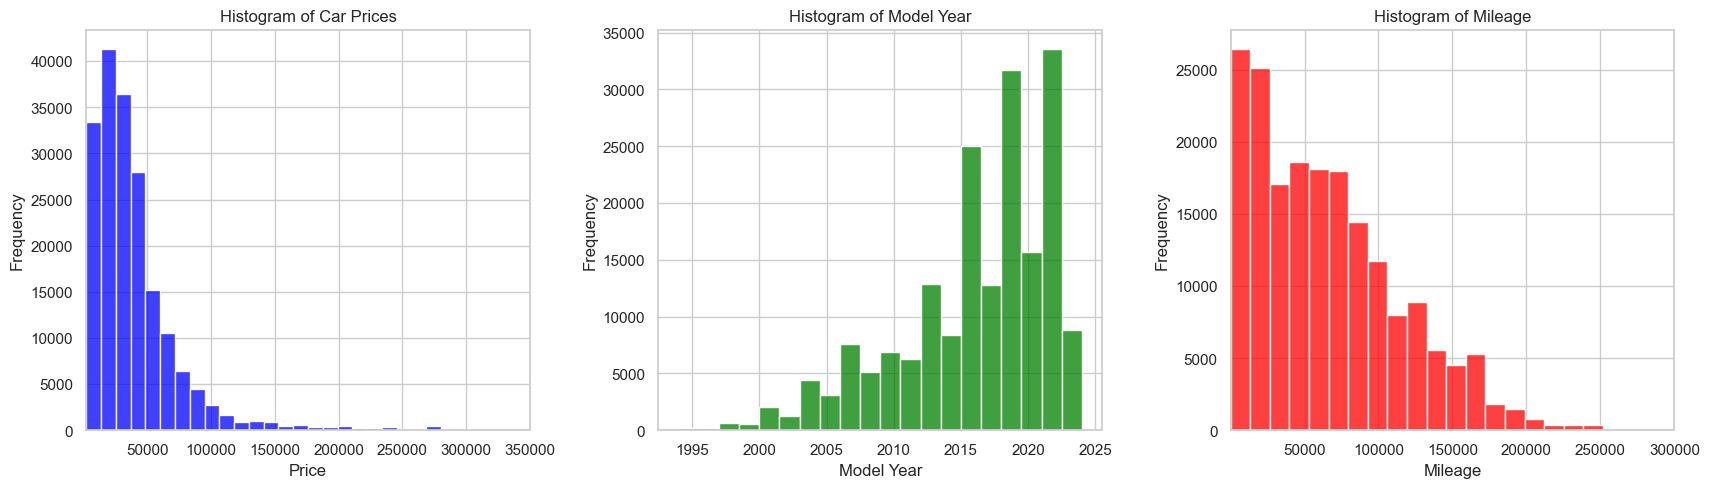

In [23]:
# Set the aesthetic style of the plots
sns.set_theme(style='whitegrid')

# Set up the figure and axes for a 1x3 grid of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.tight_layout(pad=5.0)

# Plot histogram for 'price'
sns.histplot(df_filtered_v1['price'], bins=30, kde=False, color='blue', ax=axes[0])
axes[0].set_xlim(2000, 350000)  # Setting the x-axis range
axes[0].set_title('Histogram of Car Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'model_year'
sns.histplot(df_filtered_v1['model_year'], bins=20, kde=False, color='green', ax=axes[1])
axes[1].set_title('Histogram of Model Year')
axes[1].set_xlabel('Model Year')
axes[1].set_ylabel('Frequency')

# Plot histogram for 'milage'
sns.histplot(df_filtered_v1['milage'], bins=20, kde=False, color='red', ax=axes[2])
axes[2].set_xlim(100, 300000)  # Setting the x-axis range
axes[2].set_title('Histogram of Mileage')
axes[2].set_xlabel('Mileage')
axes[2].set_ylabel('Frequency')

plt.show()

#### Now it looks much smoother!

### Data Cleaning: Dealing with null values for categorical data

In [24]:
df_filtered_v1.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5053
engine              0
transmission        0
ext_col             0
int_col             0
accident         2425
clean_title     21196
price               0
dtype: int64

In [27]:
df_filtered_v1['clean_title'].value_counts()

clean_title
Yes    165950
Name: count, dtype: int64

Since all of the cars in our filtered data have a clean title, let's fill all null values with Yes. 

In [29]:
# Fill null values in 'clean_title' with 'Yes'
df_filtered_v1['clean_title'].fillna('Yes', inplace=True)

# Verify the operation
print(f"Null values in 'clean_title' after filling: {df_filtered_v1['clean_title'].isnull().sum()}")

Null values in 'clean_title' after filling: 0


/var/folders/r3/_d0_r97169g0lxpyj8681vgw0000gn/T/ipykernel_78768/142801476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered_v1['clean_title'].fillna('Yes', inplace=True)


In [28]:
df_filtered_v1['fuel_type'].value_counts()

fuel_type
Gasoline          164827
Hybrid              6792
E85 Flex Fuel       5391
Diesel              3901
–                    647
Plug-In Hybrid       520
not supported         15
Name: count, dtype: int64

Since the majority of cars are Gasoline, let's fill the null values with Gasoline

In [30]:
# Fill null values in 'fuel_type' with 'Gasoline'
df_filtered_v1['fuel_type'].fillna('Gasoline', inplace=True)

# Verify the operation
print(f"Null values in 'fuel_type' after filling: {df_filtered_v1['fuel_type'].isnull().sum()}")

Null values in 'fuel_type' after filling: 0


/var/folders/r3/_d0_r97169g0lxpyj8681vgw0000gn/T/ipykernel_78768/3180561894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered_v1['fuel_type'].fillna('Gasoline', inplace=True)


In [31]:
df_filtered_v1['accident'].value_counts()

accident
None reported                             143321
At least 1 accident or damage reported     41400
Name: count, dtype: int64

For the accident null values, since it's only around 1% of the data, let's just drop those.

In [32]:
# Drop rows where 'accident' has null values
df_filtered_v1.dropna(subset=['accident'], inplace=True)

# Verify the operation
print(f"Null values in 'accident' after dropping: {df_filtered_v1['accident'].isnull().sum()}")


Null values in 'accident' after dropping: 0


In [33]:
df_filtered_v1.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [34]:
df_filtered_v1.shape

(184721, 13)

We have cleaned up the data and now have over 184000 data points to work with!